# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

         This is Pre-Processing,Training and Tesing for Capstone Projects

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

In [56]:
### load data data from House Sales csv file into a panda dataframe
### df = pd.read_csv('House Sales Values.csv')

df = pd.read_csv('kc_house_data.csv')
### rename some columns to match with old file
df.rename(columns={'yr_built':'YearBuilt','price':'SalePrice'},inplace=True)
df.columns

Index(['id', 'date', 'SalePrice', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'YearBuilt', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

                                   Pre-Processing

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

In [57]:
df.drop(df[['id', 'date','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15','lat', 'long']],axis=1,inplace=True)

In [58]:
df.columns

Index(['SalePrice', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'YearBuilt', 'yr_renovated', 'zipcode'],
      dtype='object')

In [59]:
### rearrange columns to place SalePrice at end as target variable (y)
df = df.reindex(columns=['bedrooms','bathrooms','condition','grade','YearBuilt','zipcode','SalePrice'])

In [60]:
df.columns

Index(['bedrooms', 'bathrooms', 'condition', 'grade', 'YearBuilt', 'zipcode',
       'SalePrice'],
      dtype='object')

In [61]:
df.shape

(21613, 7)

In [62]:
df.head(3)

,bedrooms,bathrooms,condition,grade,YearBuilt,zipcode,SalePrice
0,3,1.00,3,7,1955,98178,221900.0
1,3,2.25,3,7,1951,98125,538000.0
2,2,1.00,3,6,1933,98028,180000.0


In [63]:
df.tail(3)

,bedrooms,bathrooms,condition,grade,YearBuilt,zipcode,SalePrice
21610,2,0.75,3,7,2009,98144,402101.0
21611,3,2.50,3,8,2004,98027,400000.0
21612,2,0.75,3,7,2008,98144,325000.0


In [64]:
### check whether imputing needed
df.isnull().sum()

bedrooms     0
bathrooms    0
condition    0
grade        0
YearBuilt    0
zipcode      0
SalePrice    0
dtype: int64

imputing not necessary
### for column, value in df.items():
###    if df[column].dtype == np.number:
###        df[column] = df[column].fillna(df[column].mean())

In [65]:
#Describing our dataset
df.describe()

,bedrooms,bathrooms,condition,grade,YearBuilt,zipcode,SalePrice
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,3.370842,2.114757,3.409430,7.656873,1971.005136,98077.939805,5.400881e+05
std,0.930062,0.770163,0.650743,1.175459,29.373411,53.505026,3.671272e+05
min,0.000000,0.000000,1.000000,1.000000,1900.000000,98001.000000,7.500000e+04
25%,3.000000,1.750000,3.000000,7.000000,1951.000000,98033.000000,3.219500e+05
50%,3.000000,2.250000,3.000000,7.000000,1975.000000,98065.000000,4.500000e+05
75%,4.000000,2.500000,4.000000,8.000000,1997.000000,98118.000000,6.450000e+05
max,33.000000,8.000000,5.000000,13.000000,2015.000000,98199.000000,7.700000e+06


In [66]:
#Looking at shape of our dataframe
df.shape

(21613, 7)

In [67]:
#Looking at data types in our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   21613 non-null  int64  
 1   bathrooms  21613 non-null  float64
 2   condition  21613 non-null  int64  
 3   grade      21613 non-null  int64  
 4   YearBuilt  21613 non-null  int64  
 5   zipcode    21613 non-null  int64  
 6   SalePrice  21613 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

                       Plots for Visualization 

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

In [68]:
df.columns

Index(['bedrooms', 'bathrooms', 'condition', 'grade', 'YearBuilt', 'zipcode',
       'SalePrice'],
      dtype='object')

In [69]:
from sklearn.preprocessing import LabelEncoder

#get all categorical features
categorical_cols = ['condition','grade']
print(categorical_cols)
print("number of categorical features = ",len(categorical_cols))

#convert categorical variables into labels
labelEncoder = LabelEncoder()

#applying the label encoder to the categorical features
for categorical_col in categorical_cols:
    df[categorical_col] =  labelEncoder.fit_transform(df[categorical_col])
    
print("all categorical features converted successfully")

['condition', 'grade']
number of categorical features =  2
all categorical features converted successfully


In [70]:
from scipy import stats

#Calculate z scores
z_scores = np.abs(stats.zscore(df))

#Narrow down data set to all columns with z scores of less than 3
df = df[(z_scores < 3).all(axis=1)]
print ("data frame with no outliers shape", df.shape)
print ("data frame with no outliers describe", df.describe())

data frame with no outliers shape (20956, 7)
data frame with no outliers describe            bedrooms     bathrooms     condition         grade     YearBuilt  \
count  20956.000000  20956.000000  20956.000000  20956.000000  20956.000000   
mean       3.339282      2.072426      2.413008      5.596345   1970.939397   
std        0.859372      0.707116      0.643764      1.078509     29.234909   
min        1.000000      0.000000      1.000000      3.000000   1900.000000   
25%        3.000000      1.500000      2.000000      5.000000   1952.000000   
50%        3.000000      2.250000      2.000000      5.000000   1975.000000   
75%        4.000000      2.500000      3.000000      6.000000   1996.000000   
max        6.000000      4.250000      4.000000      9.000000   2015.000000   

            zipcode     SalePrice  
count  20956.000000  2.095600e+04  
mean   98078.360994  5.036233e+05  
std       53.413989  2.541152e+05  
min    98001.000000  8.200000e+04  
25%    98033.000000  3.200

Overall Sale Price distribution


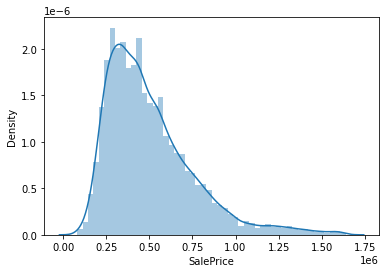

In [71]:
#let's visualize our data to look at how sale price is distributed
import matplotlib.pyplot as plt
import seaborn as sns

print ("Overall Sale Price distribution")
sns.distplot(df['SalePrice']);

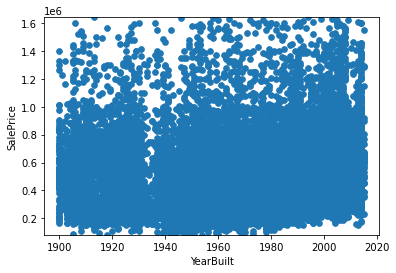

In [72]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(82000,1640000), s=32);

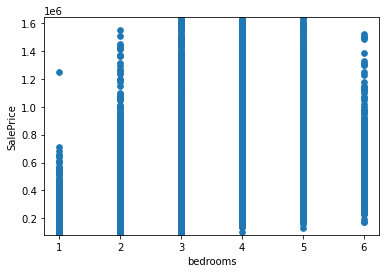

In [73]:
var = 'bedrooms'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(82000,1640000), s=32);

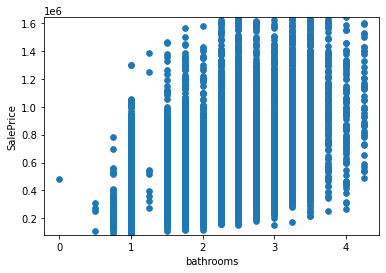

In [74]:
var = 'bathrooms'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(82000,1640000), s=32);

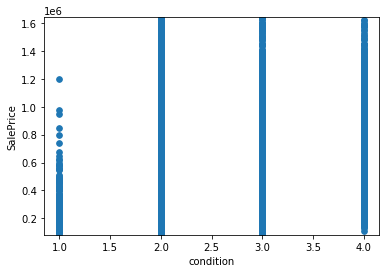

In [75]:
var = 'condition'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(82000,1640000), s=32);

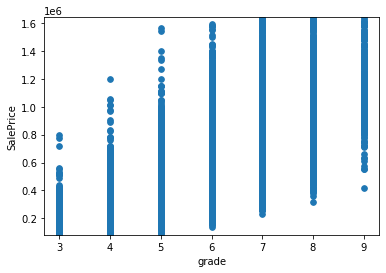

In [76]:
var = 'grade'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(82000,1640000), s=32);

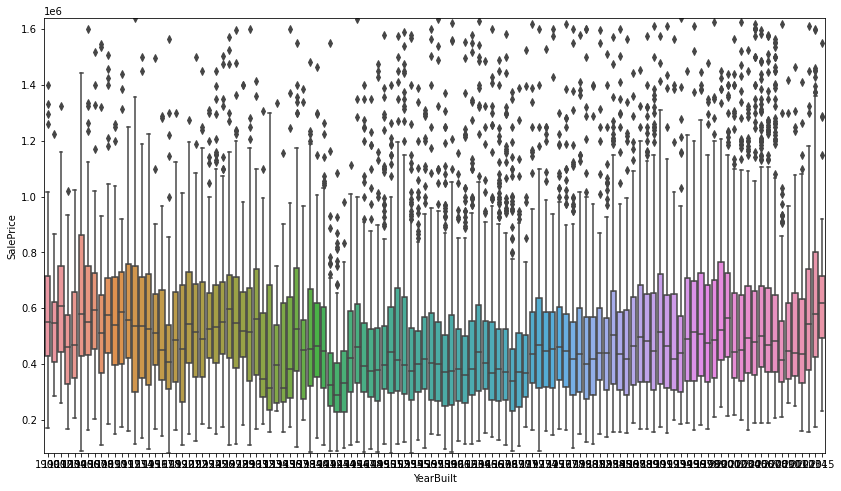

In [77]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=82000, ymax=1640000);

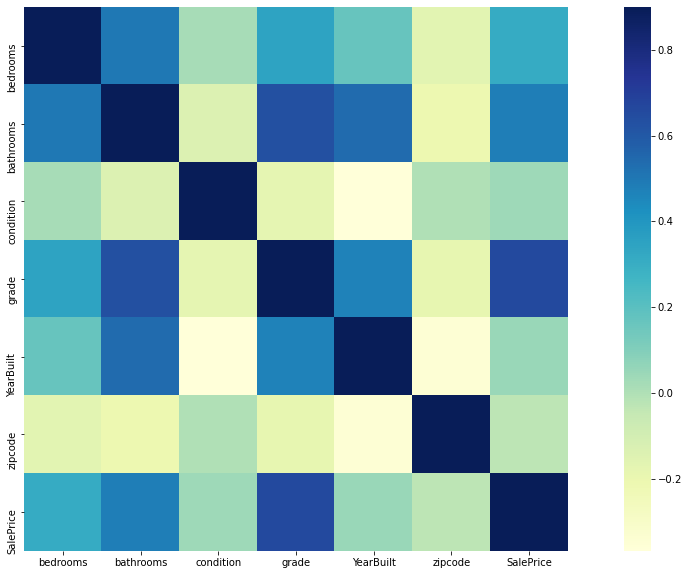

In [78]:
#correlation matrix
correlation_matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(correlation_matrix, cmap="YlGnBu", vmax=.9, square=True);

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

                           Training, Testing and Predictions 

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

In [79]:
#Splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.50, random_state=80, shuffle =True)
print('Data split successfully in training and test data sets')

Data split successfully in training and test data sets


In [80]:
#Building and Testing Linear Regression Model
from sklearn.linear_model import LinearRegression

#Initializaing the Linear Regression Model
LR = LinearRegression(copy_X=True)
LR.fit(X_train,y_train)
print("Linear regression model trained successfully")

#Making a prediction using the test data in the Linear Regression Model
yhat = LR.predict(X_test)

#Two ways to measure the accuracy of the Linear Regression Model
#1) Mean Squared Error (MSE) that calculates the difference between actual and predicted values as follows
from sklearn.metrics import mean_squared_error
print ("Mean squared error of Linear Regression Model", mean_squared_error(y_test, yhat))

#2) R-squared also known as coefficient of determination that calculates how close is the data to the fitted regression line
print ("R squared error of Linear Regression Model on Training Data", LR.score (X_train, y_train))
print ("R squared error of Linear Regression Model on Testing Data", LR.score (X_test, y_test))

Linear regression model trained successfully
Mean squared error of Linear Regression Model 28459960214.056194
R squared error of Linear Regression Model on Training Data 0.5675902612348798
R squared error of Linear Regression Model on Testing Data 0.5615908885118661


# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

            Correlations Between Sale Price and all other Features 

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

In [81]:
print(df.corr() ['SalePrice'].abs().sort_values(ascending=False))

SalePrice    1.000000
grade        0.661887
bathrooms    0.480749
bedrooms     0.311940
YearBuilt    0.050395
condition    0.038532
zipcode      0.027225
Name: SalePrice, dtype: float64
